In [1]:
# import libraries

import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline
import cartopy
import cartopy.crs as ccrs
import matplotlib
from netCDF4 import Dataset
from mpl_toolkits.axes_grid1 import make_axes_locatable
import numpy.ma as ma

import os
import matplotlib.colors as colors

import scipy
from cartopy.util import add_cyclic_point
import matplotlib.ticker as mticker
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

import glob

print ('libraries imported')

libraries imported


In [43]:
#read all diff amm_pattern_mon HadISST Observations

# read sst files

HadISST = xr.open_dataset('/Users/milesryan-cummings/Desktop/dissertation/data/HadISST/HadISST.cvdp_data.1870-2016.nc', decode_times=False) 
ammsst = HadISST['amm_pattern_mon']
atl3sst = HadISST['atl3_pattern_mon']

# lat and lon
lat = HadISST['lat']
lon= HadISST['lon']

print ('files read')

files read


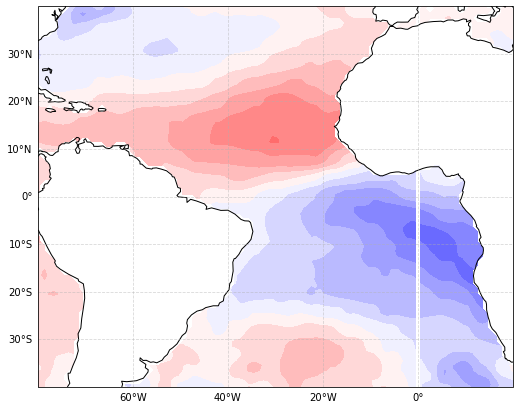

In [44]:
#plotting amm sst

#temperatures

cmap= plt.get_cmap('bwr') #define colour map

#define colormap's range and scale

clim=[-1.3,1.3]
bounds = np.linspace(clim[0], clim[1], 21)
norm = colors.BoundaryNorm(boundaries=bounds, ncolors=256)

#regional map 

region=[-80, 20, -40, 40] #[lon_min, lon_max, lat_min, lat_max]

projection = ccrs.PlateCarree(central_longitude=0.0, globe=None)
transform= ccrs.PlateCarree()

plt.figure(figsize=(10,7))
ax= plt.axes(projection=projection)


ax.coastlines()
gl= ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, alpha=0.5, linestyle='--')
gl.xlabels_top = False
gl.ylabels_left = True
gl.ylabels_right = False


#gl.xlocator = mticker.FixedLocator([-180, -45, 0, 45, 180])
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER 
fig=ax.contourf(lon, lat, ammsst, levels=bounds, transform=transform, cmap=cmap, norm=norm)
ax.set_extent(region, ccrs.PlateCarree())
 

#cax, kw = matplotlib.colorbar.make_axes(ax,location='right', pad=0.05, shrink=0.77)
#cb = plt.colorbar(fig,cax=cax, extend='both', **kw)
#cb.set_label(label='SST Anomaly ($^\circ$C / $^\circ$C)', size=20)
plt.savefig('/Users/milesryan-cummings/Desktop/dissertation/outputs/figs/HadISST_png/ammsst', bbox_inches='tight',pad_inches = 0.02)

/Users/milesryan-cummings/opt/anaconda3/envs/xesmf_env/lib/python3.7/site-packages/ipykernel_launcher.py:39: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.


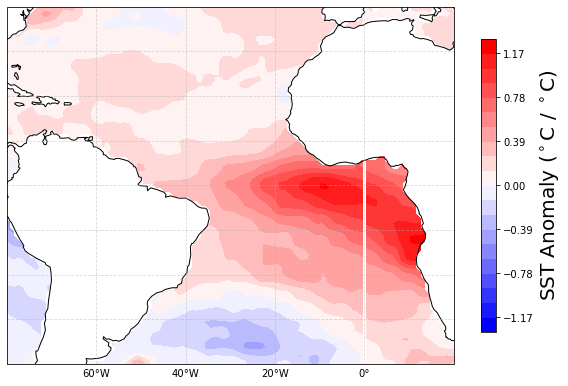

In [45]:
#plotting atl3 sst

#temperatures

cmap= plt.get_cmap('bwr') #define colour map

#define colormap's range and scale

clim=[-1.3,1.3]
bounds = np.linspace(clim[0], clim[1], 21)
norm = colors.BoundaryNorm(boundaries=bounds, ncolors=256)

#regional map 

region=[-80, 20, -40, 40] #[lon_min, lon_max, lat_min, lat_max]

projection = ccrs.PlateCarree(central_longitude=0.0, globe=None)
transform= ccrs.PlateCarree()

plt.figure(figsize=(10,7))
ax= plt.axes(projection=projection)

ax.coastlines()
gl= ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, alpha=0.5, linestyle='--')
gl.xlabels_top = False
gl.ylabels_left = False
gl.ylabels_right = False


#gl.xlocator = mticker.FixedLocator([-180, -45, 0, 45, 180])
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER

fig=ax.contourf(lon, lat, atl3sst, levels=bounds, transform=transform, cmap=cmap, norm=norm)
ax.set_extent(region, ccrs.PlateCarree())
 

cax, kw = matplotlib.colorbar.make_axes(ax,location='right', pad=0.05, shrink=0.77)
cb = plt.colorbar(fig,cax=cax, extend='both', **kw)
cb.set_label(label='SST Anomaly ($^\circ$C / $^\circ$C)', size=20)
plt.savefig('/Users/milesryan-cummings/Desktop/dissertation/outputs/figs/HadISST_png/atl3sst', bbox_inches='tight',pad_inches = 0.02)

In [7]:
#open ensemble mean amm sst for historical and piControl 

#read all diff AMM pr (regression) files

from os import walk

f = []
mypath = "/Users/milesryan-cummings/Desktop/dissertation/outputs/netcdf/amm_pattern_mon"

for (dirpath, dirnames, filenames) in walk(mypath):
    f.extend(filenames)
    if '.DS_Store' in f:
        f.remove('.DS_Store')
    break
    
f

['PMIP3_historical_amm_pattern_mon.nc',
 'PMIP4_historical_amm_pattern_mon.nc',
 'PMIP4_piControl_amm_pattern_mon.nc',
 'PMIP3_piControl_amm_pattern_mon.nc']

In [9]:
def plotmap(field_to_plot, lat, lon, filename):

    cmap= plt.get_cmap('bwr') #define colour map
    clim=[-1.3,1.3]
    bounds = np.linspace(clim[0], clim[1], 21)
    norm = colors.BoundaryNorm(boundaries=bounds, ncolors=256)
    region=[-80, 20, -40, 40] #[lon_min, lon_max, lat_min, lat_max]
    projection = ccrs.PlateCarree(central_longitude=0.0, globe=None)
    transform= ccrs.PlateCarree()
    plt.figure(figsize=(10,7))
    ax= plt.axes(projection=projection)
    ax.coastlines()
    gl= ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, alpha=0.5, linestyle='--')
    gl.xlabels_top = False
    gl.ylabels_left = True
    gl.ylabels_right = False
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    fig=ax.contourf(lon, lat, field_to_plot, levels=bounds, transform=transform, cmap=cmap, norm=norm)
    ax.set_extent(region, ccrs.PlateCarree())    
    #cax, kw = matplotlib.colorbar.make_axes(ax,location='right', pad=0.05, shrink=0.77)
    #cb = plt.colorbar(fig,cax=cax, extend='both', **kw)
    #cb.set_label(label='SST Anomaly ($^\circ$C / $^\circ$C)', size=20)
    plt.savefig(filename, bbox_inches='tight',pad_inches = 0.02)

/Users/milesryan-cummings/opt/anaconda3/envs/xesmf_env/lib/python3.7/site-packages/cartopy/mpl/gridliner.py:307: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/Users/milesryan-cummings/opt/anaconda3/envs/xesmf_env/lib/python3.7/site-packages/cartopy/mpl/gridliner.py:331: UserWarning: The .ylabels_left attribute is deprecated. Please use .left_labels to toggle visibility instead.
  warnings.warn('The .ylabels_left attribute is deprecated. Please '
/Users/milesryan-cummings/opt/anaconda3/envs/xesmf_env/lib/python3.7/site-packages/cartopy/mpl/gridliner.py:343: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '
/Users/milesryan-cummings/opt/anaconda3/envs/xesmf_env/lib/python3.7/site-packages/cartopy/mpl/gridliner.py:307: UserWarning

masked_array(
  data=[[       nan,        nan,        nan, ...,        nan,        nan,
                nan],
        [       nan,        nan,        nan, ...,        nan,        nan,
                nan],
        [       nan,        nan,        nan, ...,        nan,        nan,
                nan],
        ...,
        [0.00358589, 0.00357824, 0.00357201, ..., 0.00349656, 0.00355919,
         0.00358589],
        [0.00534278, 0.005352  , 0.0053457 , ..., 0.00528548, 0.00532043,
         0.00534278],
        [0.00523317, 0.0052337 , 0.00522792, ..., 0.00520911, 0.00522482,
         0.00523317]],
  mask=False,
  fill_value=1e+20)

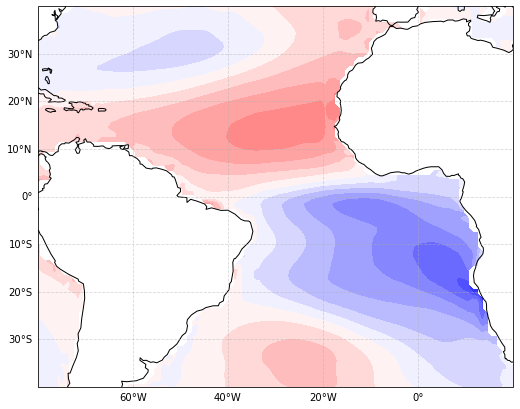

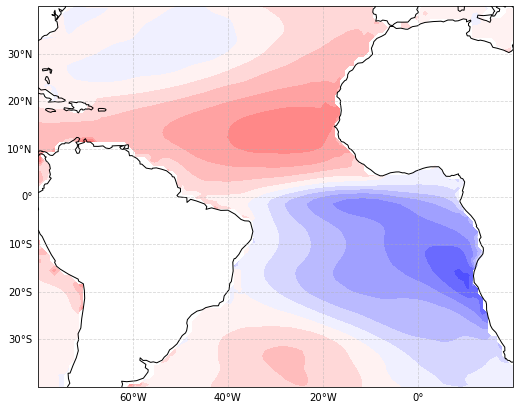

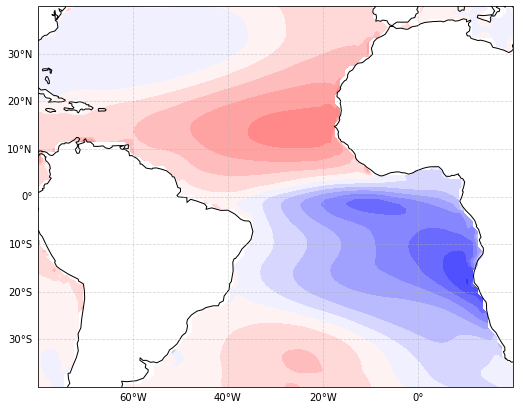

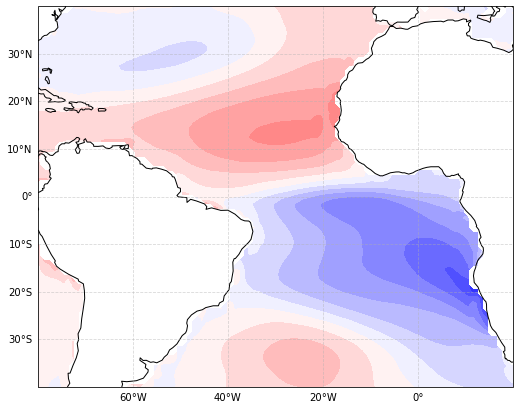

In [10]:
#open datasets
variable_name= 'amm_pattern_mon'

for filename in f:
    data_object = xr.open_dataset(f'/Users/milesryan-cummings/Desktop/dissertation/outputs/netcdf/amm_pattern_mon/{filename}', decode_times=False)
    ensemble_mean = data_object.mean(dim='gcms', skipna=True, keep_attrs=True)
    field_to_plot = ensemble_mean[variable_name]
    lat=ensemble_mean['lat']
    lon=ensemble_mean['lon']
    field_to_plot, lon = add_cyclic_point(field_to_plot, coord=lon)
    output_filename = f'/Users/milesryan-cummings/Desktop/dissertation/outputs/figs/amm_pattern_mon/{filename}'+'.png'
    plotmap(field_to_plot, lat, lon, output_filename)
    
field_to_plot

In [14]:
#open ensemble mean amm sst for historical and piControl 

#read all diff AMM pr (regression) files

from os import walk

f = []
mypath = "/Users/milesryan-cummings/Desktop/dissertation/outputs/netcdf/amm_pattern_mon/piControl"

for (dirpath, dirnames, filenames) in walk(mypath):
    f.extend(filenames)
    if '.DS_Store' in f:
        f.remove('.DS_Store')
    break
    
f

['PMIP4_piControl_amm_pattern_mon.nc']

In [15]:
def plotmap(field_to_plot, lat, lon, filename):

    cmap= plt.get_cmap('bwr') #define colour map
    clim=[-1.3,1.3]
    bounds = np.linspace(clim[0], clim[1], 21)
    norm = colors.BoundaryNorm(boundaries=bounds, ncolors=256)
    region=[-80, 20, -40, 40] #[lon_min, lon_max, lat_min, lat_max]
    projection = ccrs.PlateCarree(central_longitude=0.0, globe=None)
    transform= ccrs.PlateCarree()
    plt.figure(figsize=(10,7))
    ax= plt.axes(projection=projection)
    ax.coastlines()
    gl= ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, alpha=0.5, linestyle='--')
    gl.xlabels_top = False
    gl.ylabels_left = True
    gl.ylabels_right = False
    gl.xlabels_bottom= False 
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    fig=ax.contourf(lon, lat, field_to_plot, levels=bounds, transform=transform, cmap=cmap, norm=norm)
    ax.set_extent(region, ccrs.PlateCarree())    
    #cax, kw = matplotlib.colorbar.make_axes(ax,location='right', pad=0.05, shrink=0.77)
    #cb = plt.colorbar(fig,cax=cax, extend='both', **kw)
    #cb.set_label(label='SST Anomaly ($^\circ$C / $^\circ$C)', size=20)
    plt.savefig(filename, bbox_inches='tight',pad_inches = 0.02)

/Users/milesryan-cummings/opt/anaconda3/envs/xesmf_env/lib/python3.7/site-packages/cartopy/mpl/gridliner.py:307: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/Users/milesryan-cummings/opt/anaconda3/envs/xesmf_env/lib/python3.7/site-packages/cartopy/mpl/gridliner.py:331: UserWarning: The .ylabels_left attribute is deprecated. Please use .left_labels to toggle visibility instead.
  warnings.warn('The .ylabels_left attribute is deprecated. Please '
/Users/milesryan-cummings/opt/anaconda3/envs/xesmf_env/lib/python3.7/site-packages/cartopy/mpl/gridliner.py:343: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '
/Users/milesryan-cummings/opt/anaconda3/envs/xesmf_env/lib/python3.7/site-packages/cartopy/mpl/gridliner.py:319: UserWarning

masked_array(
  data=[[       nan,        nan,        nan, ...,        nan,        nan,
                nan],
        [       nan,        nan,        nan, ...,        nan,        nan,
                nan],
        [       nan,        nan,        nan, ...,        nan,        nan,
                nan],
        ...,
        [0.00387866, 0.00388474, 0.00391587, ..., 0.00387672, 0.00388041,
         0.00387866],
        [0.00394953, 0.00396569, 0.00397739, ..., 0.00392426, 0.00393688,
         0.00394953],
        [0.00335707, 0.00336892, 0.00337688, ..., 0.00333601, 0.00334565,
         0.00335707]],
  mask=False,
  fill_value=1e+20)

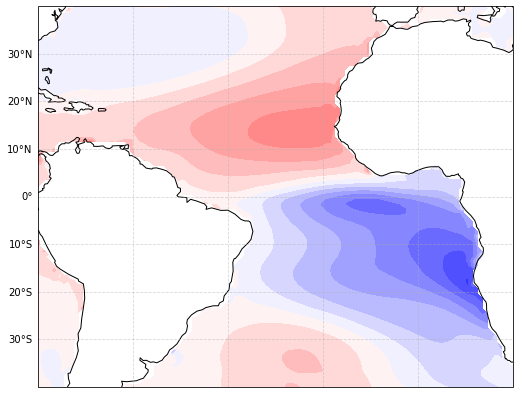

In [16]:
#open datasets
variable_name= 'amm_pattern_mon'

for filename in f:
    data_object = xr.open_dataset(f'/Users/milesryan-cummings/Desktop/dissertation/outputs/netcdf/amm_pattern_mon/piControl/{filename}', decode_times=False)
    ensemble_mean = data_object.mean(dim='gcms', skipna=True, keep_attrs=True)
    field_to_plot = ensemble_mean[variable_name]
    lat=ensemble_mean['lat']
    lon=ensemble_mean['lon']
    field_to_plot, lon = add_cyclic_point(field_to_plot, coord=lon)
    output_filename = f'/Users/milesryan-cummings/Desktop/dissertation/outputs/figs/amm_pattern_mon/piControl/{filename}'+'.png'
    plotmap(field_to_plot, lat, lon, output_filename)
    
field_to_plot

In [11]:
#open ensemble mean atl3 sst for historical and piControl 

#read all diff atl3 sstfiles

from os import walk

f = []
mypath = "/Users/milesryan-cummings/Desktop/dissertation/outputs/netcdf/atl3_pattern_mon"

for (dirpath, dirnames, filenames) in walk(mypath):
    f.extend(filenames)
    if '.DS_Store' in f:
        f.remove('.DS_Store')
    break
    
f

['PMIP3_piControl_atl3_pattern_mon.nc',
 'PMIP4_piControl_atl3_pattern_mon.nc',
 'PMIP3_historical_atl3_pattern_mon.nc',
 'PMIP4_historical_atl3_pattern_mon.nc']

In [12]:
def plotmap(field_to_plot, lat, lon, filename):

    cmap= plt.get_cmap('bwr') #define colour map
    clim=[-1.3,1.3]
    bounds = np.linspace(clim[0], clim[1], 21)
    norm = colors.BoundaryNorm(boundaries=bounds, ncolors=256)
    region=[-80, 20, -40, 40] #[lon_min, lon_max, lat_min, lat_max]
    projection = ccrs.PlateCarree(central_longitude=0.0, globe=None)
    transform= ccrs.PlateCarree()
    plt.figure(figsize=(10,7))
    ax= plt.axes(projection=projection)
    ax.coastlines()
    gl= ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, alpha=0.5, linestyle='--')
    gl.xlabels_top = False
    gl.ylabels_left = False
    gl.ylabels_right = False
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    fig=ax.contourf(lon, lat, field_to_plot, levels=bounds, transform=transform, cmap=cmap, norm=norm)
    ax.set_extent(region, ccrs.PlateCarree())
    cax, kw = matplotlib.colorbar.make_axes(ax,location='right', pad=0.05, shrink=0.77)
    cb = plt.colorbar(fig,cax=cax, extend='both', **kw)
    cb.set_label(label='SST Anomaly ($^\circ$C / $^\circ$C)', size=20)    
    plt.savefig(filename, bbox_inches='tight',pad_inches = 0.02)
    
    
    

/Users/milesryan-cummings/opt/anaconda3/envs/xesmf_env/lib/python3.7/site-packages/cartopy/mpl/gridliner.py:307: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/Users/milesryan-cummings/opt/anaconda3/envs/xesmf_env/lib/python3.7/site-packages/cartopy/mpl/gridliner.py:331: UserWarning: The .ylabels_left attribute is deprecated. Please use .left_labels to toggle visibility instead.
  warnings.warn('The .ylabels_left attribute is deprecated. Please '
/Users/milesryan-cummings/opt/anaconda3/envs/xesmf_env/lib/python3.7/site-packages/cartopy/mpl/gridliner.py:343: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '
/Users/milesryan-cummings/opt/anaconda3/envs/xesmf_env/lib/python3.7/site-packages/ipykernel_launcher.py:22: MatplotlibDepre

masked_array(
  data=[[       nan,        nan,        nan, ...,        nan,        nan,
                nan],
        [       nan,        nan,        nan, ...,        nan,        nan,
                nan],
        [       nan,        nan,        nan, ...,        nan,        nan,
                nan],
        ...,
        [0.00573743, 0.00581117, 0.00583141, ..., 0.00562323, 0.00566357,
         0.00573743],
        [0.00531137, 0.00535419, 0.00537396, ..., 0.0052637 , 0.0052772 ,
         0.00531137],
        [0.00511683, 0.00512536, 0.0051346 , ..., 0.00511257, 0.00511303,
         0.00511683]],
  mask=False,
  fill_value=1e+20)

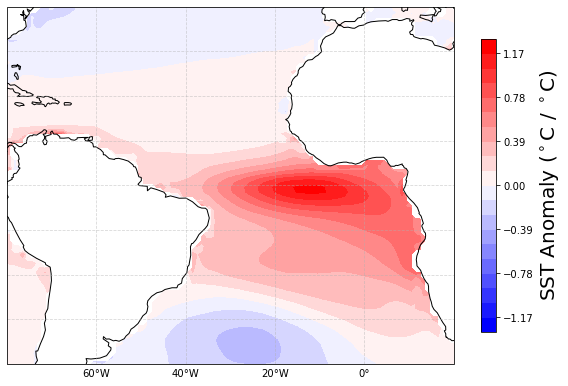

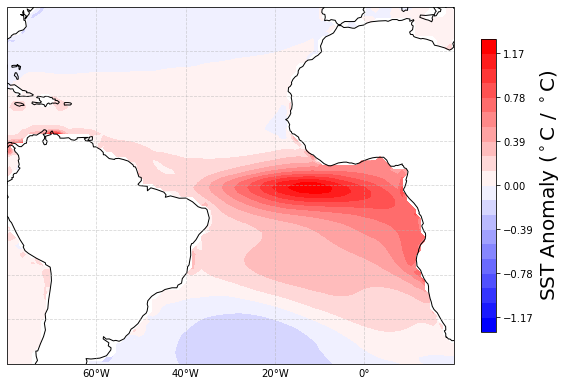

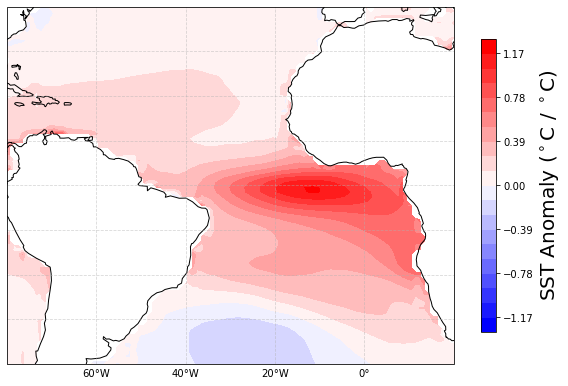

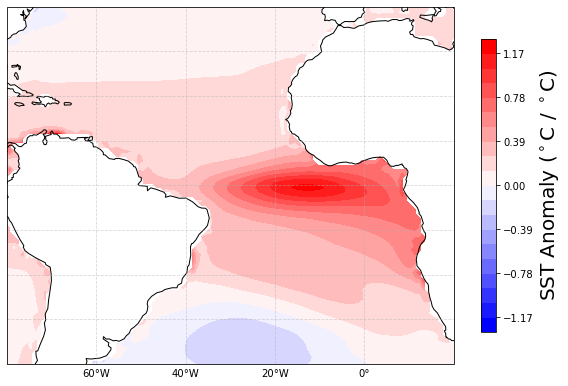

In [13]:
#open datasets
variable_name= 'atl3_pattern_mon'

for filename in f:
    data_object = xr.open_dataset(f'/Users/milesryan-cummings/Desktop/dissertation/outputs/netcdf/atl3_pattern_mon/{filename}', decode_times=False)
    ensemble_mean = data_object.mean(dim='gcms', skipna=True, keep_attrs=True)
    field_to_plot = ensemble_mean[variable_name]
    lat=ensemble_mean['lat']
    lon=ensemble_mean['lon']
    field_to_plot, lon = add_cyclic_point(field_to_plot, coord=lon)
    output_filename = f'/Users/milesryan-cummings/Desktop/dissertation/outputs/figs/atl3_pattern_mon/{filename}'+'.png'
    plotmap(field_to_plot, lat, lon, output_filename)
    
field_to_plot

In [18]:
#open ensemble mean atl3 sst for historical and piControl 

#read all diff atl3 sstfiles

from os import walk

f = []
mypath = "/Users/milesryan-cummings/Desktop/dissertation/outputs/netcdf/atl3_pattern_mon/piControl"

for (dirpath, dirnames, filenames) in walk(mypath):
    f.extend(filenames)
    if '.DS_Store' in f:
        f.remove('.DS_Store')
    break
    
f

['PMIP4_piControl_atl3_pattern_mon.nc']

In [19]:
def plotmap(field_to_plot, lat, lon, filename):

    cmap= plt.get_cmap('bwr') #define colour map
    clim=[-1.3,1.3]
    bounds = np.linspace(clim[0], clim[1], 21)
    norm = colors.BoundaryNorm(boundaries=bounds, ncolors=256)
    region=[-80, 20, -40, 40] #[lon_min, lon_max, lat_min, lat_max]
    projection = ccrs.PlateCarree(central_longitude=0.0, globe=None)
    transform= ccrs.PlateCarree()
    plt.figure(figsize=(10,7))
    ax= plt.axes(projection=projection)
    ax.coastlines()
    gl= ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, alpha=0.5, linestyle='--')
    gl.xlabels_top = False
    gl.ylabels_left = True
    gl.ylabels_right = False
    gl.xlabels_bottom= False 
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    fig=ax.contourf(lon, lat, field_to_plot, levels=bounds, transform=transform, cmap=cmap, norm=norm)
    ax.set_extent(region, ccrs.PlateCarree())
    plt.savefig(filename, bbox_inches='tight',pad_inches = 0.02)
    
    

/Users/milesryan-cummings/opt/anaconda3/envs/xesmf_env/lib/python3.7/site-packages/cartopy/mpl/gridliner.py:307: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/Users/milesryan-cummings/opt/anaconda3/envs/xesmf_env/lib/python3.7/site-packages/cartopy/mpl/gridliner.py:331: UserWarning: The .ylabels_left attribute is deprecated. Please use .left_labels to toggle visibility instead.
  warnings.warn('The .ylabels_left attribute is deprecated. Please '
/Users/milesryan-cummings/opt/anaconda3/envs/xesmf_env/lib/python3.7/site-packages/cartopy/mpl/gridliner.py:343: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '
/Users/milesryan-cummings/opt/anaconda3/envs/xesmf_env/lib/python3.7/site-packages/cartopy/mpl/gridliner.py:319: UserWarning

masked_array(
  data=[[       nan,        nan,        nan, ...,        nan,        nan,
                nan],
        [       nan,        nan,        nan, ...,        nan,        nan,
                nan],
        [       nan,        nan,        nan, ...,        nan,        nan,
                nan],
        ...,
        [0.00019484, 0.0001962 , 0.00019094, ..., 0.00015902, 0.00016603,
         0.00019484],
        [0.00021965, 0.00021504, 0.0002094 , ..., 0.0002045 , 0.00020628,
         0.00021965],
        [0.00086221, 0.00086226, 0.00086542, ..., 0.00086265, 0.00085901,
         0.00086221]],
  mask=False,
  fill_value=1e+20)

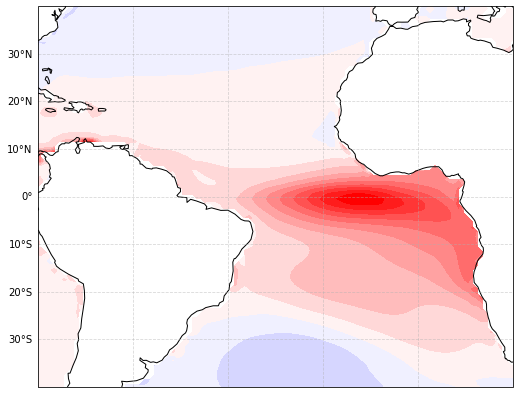

In [20]:
#open datasets
variable_name= 'atl3_pattern_mon'

for filename in f:
    data_object = xr.open_dataset(f'/Users/milesryan-cummings/Desktop/dissertation/outputs/netcdf/atl3_pattern_mon/piControl/{filename}', decode_times=False)
    ensemble_mean = data_object.mean(dim='gcms', skipna=True, keep_attrs=True)
    field_to_plot = ensemble_mean[variable_name]
    lat=ensemble_mean['lat']
    lon=ensemble_mean['lon']
    field_to_plot, lon = add_cyclic_point(field_to_plot, coord=lon)
    output_filename = f'/Users/milesryan-cummings/Desktop/dissertation/outputs/figs/atl3_pattern_mon/piControl/{filename}'+'.png'
    plotmap(field_to_plot, lat, lon, output_filename)
    
field_to_plot

In [46]:
#open reanalysis amm/atl3 pr data

ReAnal = xr.open_dataset('/Users/milesryan-cummings/Desktop/dissertation/data/C20-Reanalysis/C20-Reanalysis.cvdp_data.1871-2012.nc', decode_times=False) 


amm_ppt = ReAnal['amm_pr_regression_mon']
atl3_ppt = ReAnal['atl3_pr_regression_mon']
lat = ReAnal['lat']
lon= ReAnal['lon']

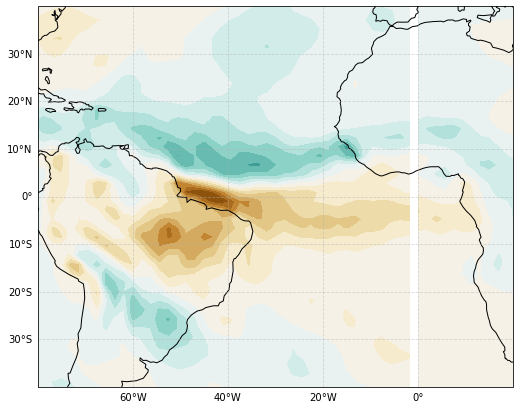

In [47]:
#plotting ReAnalysis amm pr

#ppt

cmap= plt.get_cmap('BrBG') #define colour map

#define colormap's range and scale

clim=[-2.1,2.1]
bounds = np.linspace(clim[0], clim[1], 21)
norm = colors.BoundaryNorm(boundaries=bounds, ncolors=256)

#regional map 

region=[-80, 20, -40, 40] #[lon_min, lon_max, lat_min, lat_max]

projection = ccrs.PlateCarree(central_longitude=0.0, globe=None)
transform= ccrs.PlateCarree()

plt.figure(figsize=(10,7))
ax= plt.axes(projection=projection)

ax.coastlines()
gl= ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, alpha=0.5, linestyle='--')
gl.xlabels_top = False
gl.ylabels_left = True
gl.ylabels_right = False 

#gl.xlocator = mticker.FixedLocator([-180, -45, 0, 45, 180])
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER

fig=ax.contourf(lon, lat, amm_ppt, levels=bounds, transform=transform, cmap=cmap, norm=norm)
ax.set_extent(region, ccrs.PlateCarree())
#cax, kw = matplotlib.colorbar.make_axes(ax,location='right', pad=0.05, shrink=0.77)
#cb = plt.colorbar(fig,cax=cax, extend='both', **kw)
#cb.set_label(label='AMM Precipitation Regression (mm $day^{-1}$ $^\circ$$C^{-1}$)', size=20)
plt.savefig('/Users/milesryan-cummings/Desktop/dissertation/outputs/figs/ReAnalysis/amm_ppt', bbox_inches='tight',pad_inches = 0.02)



/Users/milesryan-cummings/opt/anaconda3/envs/xesmf_env/lib/python3.7/site-packages/ipykernel_launcher.py:37: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.


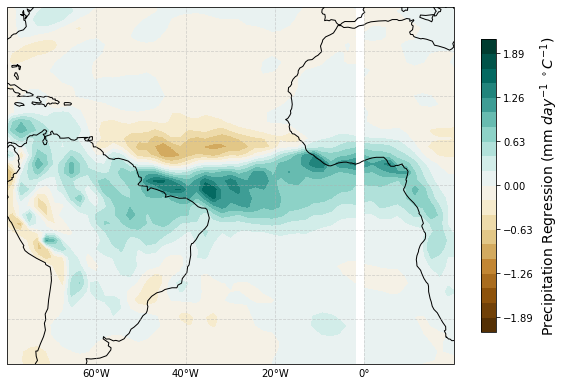

In [24]:
#plotting reanalysis atl3 pr regression

#ppt

cmap= plt.get_cmap('BrBG') #define colour map

#define colormap's range and scale

clim=[-2.1,2.1]
bounds = np.linspace(clim[0], clim[1], 21)
norm = colors.BoundaryNorm(boundaries=bounds, ncolors=256)

#regional map 

region=[-80, 20, -40, 40] #[lon_min, lon_max, lat_min, lat_max]

projection = ccrs.PlateCarree(central_longitude=0.0, globe=None)
transform= ccrs.PlateCarree()

plt.figure(figsize=(10,7))
ax= plt.axes(projection=projection)

ax.coastlines()
gl= ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, alpha=0.5, linestyle='--')
gl.xlabels_top = False
gl.ylabels_left = False
gl.ylabels_right = False

#gl.xlocator = mticker.FixedLocator([-180, -45, 0, 45, 180])
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER

fig=ax.contourf(lon, lat, atl3_ppt, levels=bounds, transform=transform, cmap=cmap, norm=norm)
ax.set_extent(region, ccrs.PlateCarree())

cax, kw = matplotlib.colorbar.make_axes(ax,location='right', pad=0.05, shrink=0.77)
cb = plt.colorbar(fig,cax=cax, extend='both', **kw)
cb.set_label(label='Precipitation Regression (mm $day^{-1}$ $^\circ$$C^{-1}$)', size=14)
plt.savefig('/Users/milesryan-cummings/Desktop/dissertation/outputs/figs/ReAnalysis/atl3_ppt', bbox_inches='tight',pad_inches = 0.02)


In [25]:
#open ensemble mean amm pr (regression) for historical and piControl 

#read all diff AMM pr (regression) files

from os import walk

f = []
mypath = "/Users/milesryan-cummings/Desktop/dissertation/outputs/netcdf/amm_pr_regression"

for (dirpath, dirnames, filenames) in walk(mypath):
    f.extend(filenames)
    if '.DS_Store' in f:
        f.remove('.DS_Store')
    break
    
f

['PMIP3_historical_amm_pr_regression_mon.nc',
 'PMIP3_piControl_amm_pr_regression_mon.nc',
 'PMIP4_historical_amm_pr_regression_mon.nc',
 'PMIP4_piControl_amm_pr_regression_mon.nc']

In [26]:
def plotmap(field_to_plot, lat, lon, filename):

    cmap= plt.get_cmap('BrBG') #define colour map
    clim=[-2.1,2.1]
    bounds = np.linspace(clim[0], clim[1], 21)
    norm = colors.BoundaryNorm(boundaries=bounds, ncolors=256)
    region=[-80, 20, -40, 40] #[lon_min, lon_max, lat_min, lat_max]
    projection = ccrs.PlateCarree(central_longitude=0.0, globe=None)
    transform= ccrs.PlateCarree()
    plt.figure(figsize=(10,7))
    ax= plt.axes(projection=projection)
    ax.coastlines()
    gl= ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, alpha=0.5, linestyle='--')
    gl.xlabels_top = False
    gl.ylabels_left = True
    gl.ylabels_right = False 
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    fig=ax.contourf(lon, lat, field_to_plot, levels=bounds, transform=transform, cmap=cmap, norm=norm)
    ax.set_extent(region, ccrs.PlateCarree())
    #cax, kw = matplotlib.colorbar.make_axes(ax,location='right', pad=0.05, shrink=0.77)
    #cb = plt.colorbar(fig,cax=cax, extend='both', **kw)
    #cb.set_label(label='Precipitation Regression (mm $day^{-1}$ $^\circ$$C^{-1}$)', size=20)  
    plt.savefig(filename, bbox_inches='tight',pad_inches = 0.02)
    

/Users/milesryan-cummings/opt/anaconda3/envs/xesmf_env/lib/python3.7/site-packages/cartopy/mpl/gridliner.py:307: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/Users/milesryan-cummings/opt/anaconda3/envs/xesmf_env/lib/python3.7/site-packages/cartopy/mpl/gridliner.py:331: UserWarning: The .ylabels_left attribute is deprecated. Please use .left_labels to toggle visibility instead.
  warnings.warn('The .ylabels_left attribute is deprecated. Please '
/Users/milesryan-cummings/opt/anaconda3/envs/xesmf_env/lib/python3.7/site-packages/cartopy/mpl/gridliner.py:343: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '
/Users/milesryan-cummings/opt/anaconda3/envs/xesmf_env/lib/python3.7/site-packages/cartopy/mpl/gridliner.py:307: UserWarning

masked_array(
  data=[[-0.00271269, -0.00267215, -0.00262536, ..., -0.00274442,
         -0.00273395, -0.00271269],
        [-0.00340489, -0.00334458, -0.00327793, ..., -0.00342406,
         -0.00342993, -0.00340489],
        [-0.00323775, -0.00338371, -0.00353788, ..., -0.00286497,
         -0.00307407, -0.00323775],
        ...,
        [ 0.00201303,  0.00200918,  0.00202572, ...,  0.00234539,
          0.00212749,  0.00201303],
        [-0.00053829, -0.00047425, -0.00041913, ..., -0.00069925,
         -0.00060449, -0.00053829],
        [-0.00052209, -0.00051273, -0.0005148 , ..., -0.00061331,
         -0.00055754, -0.00052209]],
  mask=False,
  fill_value=1e+20)

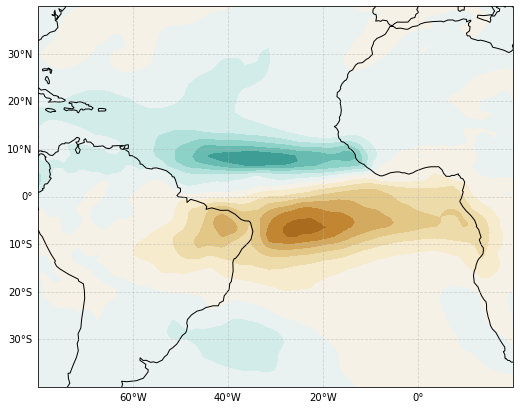

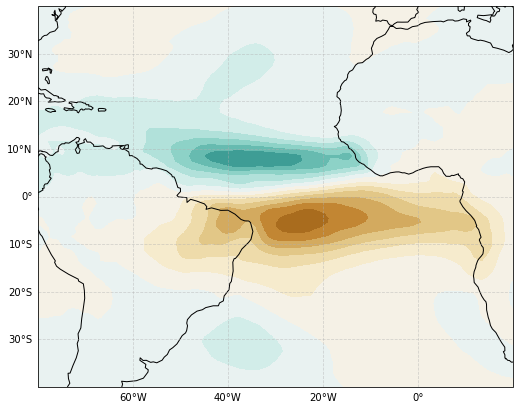

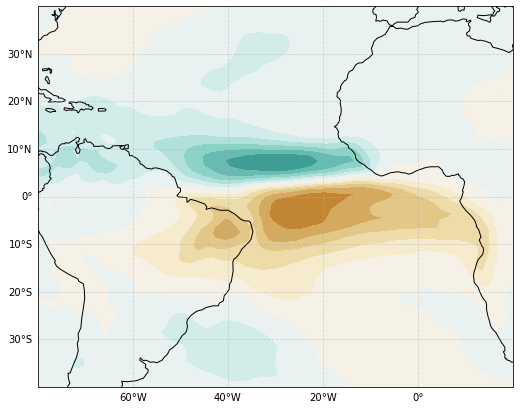

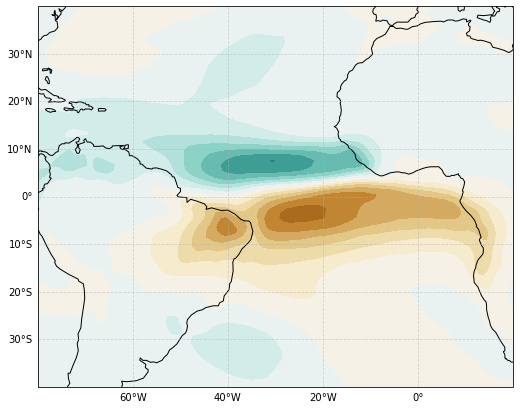

In [27]:
#open datasets
variable_name= 'amm_pr_regression_mon'

for filename in f:
    data_object = xr.open_dataset(f'/Users/milesryan-cummings/Desktop/dissertation/outputs/netcdf/amm_pr_regression/{filename}', decode_times=False)
    ensemble_mean = data_object.mean(dim='gcms', skipna=True, keep_attrs=True)
    field_to_plot = ensemble_mean[variable_name]
    lat=ensemble_mean['lat']
    lon=ensemble_mean['lon']
    field_to_plot, lon = add_cyclic_point(field_to_plot, coord=lon)
    output_filename = f'/Users/milesryan-cummings/Desktop/dissertation/outputs/figs/amm_pr_regression/{filename}'+'.png'
    plotmap(field_to_plot, lat, lon, output_filename)
    
field_to_plot

In [31]:
#open ensemble mean amm pr (regression) for historical and piControl 

#read all diff AMM pr (regression) files

from os import walk

f = []
mypath = "/Users/milesryan-cummings/Desktop/dissertation/outputs/netcdf/amm_pr_regression/piControl"

for (dirpath, dirnames, filenames) in walk(mypath):
    f.extend(filenames)
    if '.DS_Store' in f:
        f.remove('.DS_Store')
    break
    
f

['PMIP4_piControl_amm_pr_regression_mon.nc']

In [32]:
def plotmap(field_to_plot, lat, lon, filename):

    cmap= plt.get_cmap('BrBG') #define colour map
    clim=[-2.1,2.1]
    bounds = np.linspace(clim[0], clim[1], 21)
    norm = colors.BoundaryNorm(boundaries=bounds, ncolors=256)
    region=[-80, 20, -40, 40] #[lon_min, lon_max, lat_min, lat_max]
    projection = ccrs.PlateCarree(central_longitude=0.0, globe=None)
    transform= ccrs.PlateCarree()
    plt.figure(figsize=(10,7))
    ax= plt.axes(projection=projection)
    ax.coastlines()
    gl= ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, alpha=0.5, linestyle='--')
    gl.xlabels_top = False
    gl.ylabels_left = True
    gl.ylabels_right = False 
    gl.xlabels_bottom = False
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    fig=ax.contourf(lon, lat, field_to_plot, levels=bounds, transform=transform, cmap=cmap, norm=norm)
    ax.set_extent(region, ccrs.PlateCarree())
    #cax, kw = matplotlib.colorbar.make_axes(ax,location='right', pad=0.05, shrink=0.77)
    #cb = plt.colorbar(fig,cax=cax, extend='both', **kw)
    #cb.set_label(label='Precipitation Regression (mm $day^{-1}$ $^\circ$$C^{-1}$)', size=20)  
    plt.savefig(filename, bbox_inches='tight',pad_inches = 0.02)
    

/Users/milesryan-cummings/opt/anaconda3/envs/xesmf_env/lib/python3.7/site-packages/cartopy/mpl/gridliner.py:307: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/Users/milesryan-cummings/opt/anaconda3/envs/xesmf_env/lib/python3.7/site-packages/cartopy/mpl/gridliner.py:331: UserWarning: The .ylabels_left attribute is deprecated. Please use .left_labels to toggle visibility instead.
  warnings.warn('The .ylabels_left attribute is deprecated. Please '
/Users/milesryan-cummings/opt/anaconda3/envs/xesmf_env/lib/python3.7/site-packages/cartopy/mpl/gridliner.py:343: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '
/Users/milesryan-cummings/opt/anaconda3/envs/xesmf_env/lib/python3.7/site-packages/cartopy/mpl/gridliner.py:319: UserWarning

masked_array(
  data=[[-0.00271269, -0.00267215, -0.00262536, ..., -0.00274442,
         -0.00273395, -0.00271269],
        [-0.00340489, -0.00334458, -0.00327793, ..., -0.00342406,
         -0.00342993, -0.00340489],
        [-0.00323775, -0.00338371, -0.00353788, ..., -0.00286497,
         -0.00307407, -0.00323775],
        ...,
        [ 0.00201303,  0.00200918,  0.00202572, ...,  0.00234539,
          0.00212749,  0.00201303],
        [-0.00053829, -0.00047425, -0.00041913, ..., -0.00069925,
         -0.00060449, -0.00053829],
        [-0.00052209, -0.00051273, -0.0005148 , ..., -0.00061331,
         -0.00055754, -0.00052209]],
  mask=False,
  fill_value=1e+20)

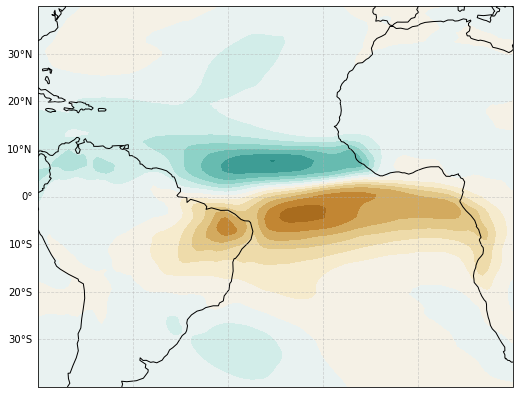

In [33]:
#open datasets
variable_name= 'amm_pr_regression_mon'

for filename in f:
    data_object = xr.open_dataset(f'/Users/milesryan-cummings/Desktop/dissertation/outputs/netcdf/amm_pr_regression/piControl/{filename}', decode_times=False)
    ensemble_mean = data_object.mean(dim='gcms', skipna=True, keep_attrs=True)
    field_to_plot = ensemble_mean[variable_name]
    lat=ensemble_mean['lat']
    lon=ensemble_mean['lon']
    field_to_plot, lon = add_cyclic_point(field_to_plot, coord=lon)
    output_filename = f'/Users/milesryan-cummings/Desktop/dissertation/outputs/figs/amm_pr_regression/piControl/{filename}'+'.png'
    plotmap(field_to_plot, lat, lon, output_filename)
    
field_to_plot

In [34]:
#open ensemble mean atl3 pr (regression) for historical and piControl 

#read all diff Atl3 pr (regression) files

from os import walk

f = []
mypath = "/Users/milesryan-cummings/Desktop/dissertation/outputs/netcdf/atl3_pr_regression_mon"

for (dirpath, dirnames, filenames) in walk(mypath):
    f.extend(filenames)
    if '.DS_Store' in f:
        f.remove('.DS_Store')
    break
    
f

['PMIP3_piControl_atl3_pr_regression_mon.nc',
 'PMIP4_piControl_atl3_pr_regression_mon.nc',
 'PMIP4_historical_atl3_pr_regression_mon.nc',
 'PMIP3_historical_atl3_pr_regression_mon.nc']

In [35]:
def plotmap(field_to_plot, lat, lon, filename):

    cmap= plt.get_cmap('BrBG') #define colour map
    clim=[-2.1,2.1]
    bounds = np.linspace(clim[0], clim[1], 21)
    norm = colors.BoundaryNorm(boundaries=bounds, ncolors=256)
    region=[-80, 20, -40, 40] #[lon_min, lon_max, lat_min, lat_max]
    projection = ccrs.PlateCarree(central_longitude=0.0, globe=None)
    transform= ccrs.PlateCarree()
    plt.figure(figsize=(10,7))
    ax= plt.axes(projection=projection)
    ax.coastlines()
    gl= ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, alpha=0.5, linestyle='--')
    gl.xlabels_top = False
    gl.ylabels_left = False
    gl.ylabels_right=False
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    fig=ax.contourf(lon, lat, field_to_plot, levels=bounds, transform=transform, cmap=cmap, norm=norm)
    ax.set_extent(region, ccrs.PlateCarree())
    cax, kw = matplotlib.colorbar.make_axes(ax,location='right', pad=0.05, shrink=0.77)
    cb = plt.colorbar(fig,cax=cax, extend='both', **kw)
    cb.set_label(label='Precipitation Regression (mm $day^{-1}$ $^\circ$$C^{-1}$)', size=14) 
    plt.savefig(filename, bbox_inches='tight',pad_inches = 0.02)
    

/Users/milesryan-cummings/opt/anaconda3/envs/xesmf_env/lib/python3.7/site-packages/cartopy/mpl/gridliner.py:307: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/Users/milesryan-cummings/opt/anaconda3/envs/xesmf_env/lib/python3.7/site-packages/cartopy/mpl/gridliner.py:331: UserWarning: The .ylabels_left attribute is deprecated. Please use .left_labels to toggle visibility instead.
  warnings.warn('The .ylabels_left attribute is deprecated. Please '
/Users/milesryan-cummings/opt/anaconda3/envs/xesmf_env/lib/python3.7/site-packages/cartopy/mpl/gridliner.py:343: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '
/Users/milesryan-cummings/opt/anaconda3/envs/xesmf_env/lib/python3.7/site-packages/ipykernel_launcher.py:22: MatplotlibDepre

masked_array(
  data=[[ 4.71064115e-03,  4.72603513e-03,  4.74005007e-03, ...,
          4.67757248e-03,  4.69476977e-03,  4.71064115e-03],
        [ 5.76226365e-03,  5.84107494e-03,  5.89683296e-03, ...,
          5.62655685e-03,  5.68815203e-03,  5.76226365e-03],
        [ 7.43896603e-03,  7.77150468e-03,  8.04436901e-03, ...,
          7.22756359e-03,  7.26376732e-03,  7.43896603e-03],
        ...,
        [-8.88381946e-05,  3.48879178e-04,  7.22466148e-04, ...,
         -2.94828146e-04, -2.97264673e-04, -8.88381946e-05],
        [-5.79939898e-04, -2.51282664e-04,  8.80623288e-05, ...,
         -4.09023269e-04, -6.22476416e-04, -5.79939898e-04],
        [ 6.99563450e-04,  1.03159761e-03,  1.34851931e-03, ...,
          9.93571947e-04,  6.90664184e-04,  6.99563450e-04]],
  mask=False,
  fill_value=1e+20)

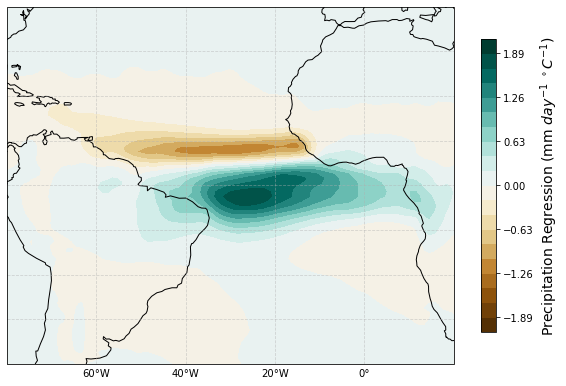

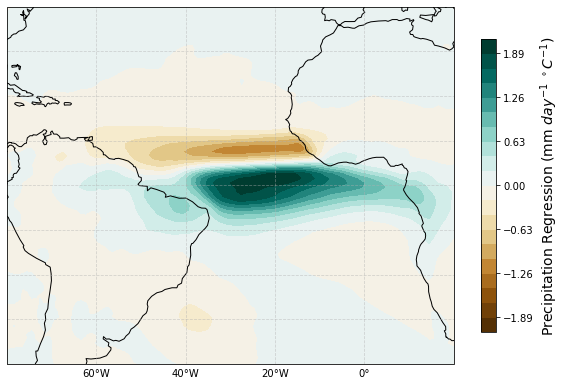

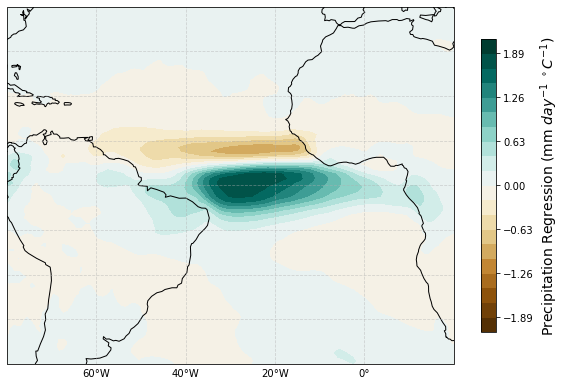

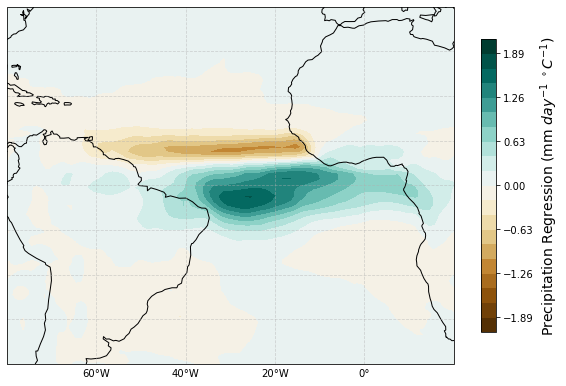

In [36]:
#open datasets
variable_name= 'atl3_pr_regression_mon'

for filename in f:
    data_object = xr.open_dataset(f'/Users/milesryan-cummings/Desktop/dissertation/outputs/netcdf/atl3_pr_regression_mon/{filename}', decode_times=False)
    ensemble_mean = data_object.mean(dim='gcms', skipna=True, keep_attrs=True)
    field_to_plot = ensemble_mean[variable_name]
    lat=ensemble_mean['lat']
    lon=ensemble_mean['lon']
    field_to_plot, lon = add_cyclic_point(field_to_plot, coord=lon)
    output_filename = f'/Users/milesryan-cummings/Desktop/dissertation/outputs/figs/atl3_pr_regression_mon/{filename}'+'.png'
    plotmap(field_to_plot, lat, lon, output_filename)
    
field_to_plot

In [38]:
#open ensemble mean atl3 pr (regression) for piControl 

#read all diff Atl3 pr (regression) files

from os import walk

f = []
mypath = "/Users/milesryan-cummings/Desktop/dissertation/outputs/netcdf/atl3_pr_regression_mon/piControl"

for (dirpath, dirnames, filenames) in walk(mypath):
    f.extend(filenames)
    if '.DS_Store' in f:
        f.remove('.DS_Store')
    break
    
f

['PMIP4_piControl_atl3_pr_regression_mon.nc']

In [41]:
def plotmap(field_to_plot, lat, lon, filename):

    cmap= plt.get_cmap('BrBG') #define colour map
    clim=[-2.1,2.1]
    bounds = np.linspace(clim[0], clim[1], 21)
    norm = colors.BoundaryNorm(boundaries=bounds, ncolors=256)
    region=[-80, 20, -40, 40] #[lon_min, lon_max, lat_min, lat_max]
    projection = ccrs.PlateCarree(central_longitude=0.0, globe=None)
    transform= ccrs.PlateCarree()
    plt.figure(figsize=(10,7))
    ax= plt.axes(projection=projection)
    ax.coastlines()
    gl= ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, alpha=0.5, linestyle='--')
    gl.xlabels_top = False
    gl.ylabels_left = True
    gl.ylabels_right=False
    gl.xlabels_bottom = False
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    fig=ax.contourf(lon, lat, field_to_plot, levels=bounds, transform=transform, cmap=cmap, norm=norm)
    ax.set_extent(region, ccrs.PlateCarree())
    #cax, kw = matplotlib.colorbar.make_axes(ax,location='right', pad=0.05, shrink=0.77)
    #cb = plt.colorbar(fig,cax=cax, extend='both', **kw)
    #cb.set_label(label='Precipitation Regression (mm $day^{-1}$ $^\circ$$C^{-1}$)', size=14) 
    plt.savefig(filename, bbox_inches='tight',pad_inches = 0.02)

/Users/milesryan-cummings/opt/anaconda3/envs/xesmf_env/lib/python3.7/site-packages/cartopy/mpl/gridliner.py:307: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/Users/milesryan-cummings/opt/anaconda3/envs/xesmf_env/lib/python3.7/site-packages/cartopy/mpl/gridliner.py:331: UserWarning: The .ylabels_left attribute is deprecated. Please use .left_labels to toggle visibility instead.
  warnings.warn('The .ylabels_left attribute is deprecated. Please '
/Users/milesryan-cummings/opt/anaconda3/envs/xesmf_env/lib/python3.7/site-packages/cartopy/mpl/gridliner.py:343: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '
/Users/milesryan-cummings/opt/anaconda3/envs/xesmf_env/lib/python3.7/site-packages/cartopy/mpl/gridliner.py:319: UserWarning

masked_array(
  data=[[ 0.00290706,  0.0029076 ,  0.00290927, ...,  0.00290482,
          0.00290463,  0.00290706],
        [ 0.00363412,  0.00362683,  0.0036291 , ...,  0.00365212,
          0.00364305,  0.00363412],
        [ 0.0035629 ,  0.00365182,  0.00376936, ...,  0.00358108,
          0.00355147,  0.0035629 ],
        ...,
        [-0.00117125, -0.00104382, -0.00086289, ..., -0.00181743,
         -0.00142378, -0.00117125],
        [ 0.00075418,  0.00082318,  0.00097804, ...,  0.00042161,
          0.0006132 ,  0.00075418],
        [ 0.00031817,  0.00035607,  0.00042218, ...,  0.00022237,
          0.00027314,  0.00031817]],
  mask=False,
  fill_value=1e+20)

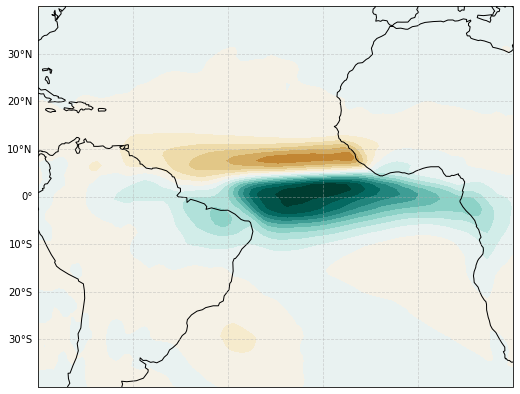

In [42]:
#open datasets
variable_name= 'atl3_pr_regression_mon'

for filename in f:
    data_object = xr.open_dataset(f'/Users/milesryan-cummings/Desktop/dissertation/outputs/netcdf/atl3_pr_regression_mon/piControl/{filename}', decode_times=False)
    ensemble_mean = data_object.mean(dim='gcms', skipna=True, keep_attrs=True)
    field_to_plot = ensemble_mean[variable_name]
    lat=ensemble_mean['lat']
    lon=ensemble_mean['lon']
    field_to_plot, lon = add_cyclic_point(field_to_plot, coord=lon)
    output_filename = f'/Users/milesryan-cummings/Desktop/dissertation/outputs/figs/atl3_pr_regression_mon/piControl/{filename}'+'.png'
    plotmap(field_to_plot, lat, lon, output_filename)
    
field_to_plot